In [317]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model
np.random.seed(0)

%matplotlib inline

In [341]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y
X, Y = load_planar_dataset()

(2, 400)


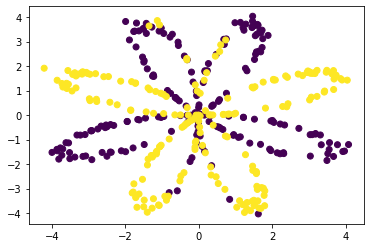

In [342]:
print(X.shape)
plt.scatter(X[0], X[1], c=Y);

In [494]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0], X[1], c=y, cmap=plt.cm.Spectral)

In [495]:
def sk_learn_fit_and_plot(model, X, Y):
    reg.fit(X.T, Y.T)
    predictions = reg.predict(X.T)
    predictions =(predictions > 0.5).T
    mean = np.mean(predictions == Y)
    plot_decision_boundary(lambda x: reg.predict(x), X, Y)
    plt.title('logistic regression')
    print(f'accuracy - {mean * 100}%')

accuracy - 47.0%


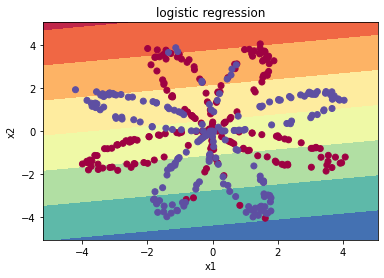

In [496]:
## linear Regression
sk_learn_fit_and_plot(sklearn.linear_model.LinearRegression(), X, Y)

accuracy - 47.0%


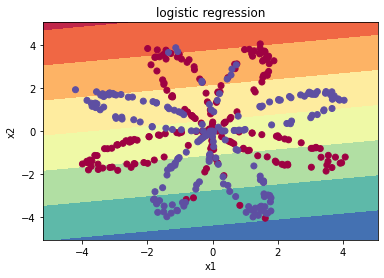

In [497]:
## Logistic Regression
sk_learn_fit_and_plot(sklearn.linear_model.LogisticRegressionCV(), X, Y)

In [498]:
# sizes
n_h = 4
n_x = X.shape[1]
n_y = Y.shape[0]
m = Y.shape[1]
n_h, n_x, n_y

(4, 400, 1)

In [499]:
# initializing weights
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(X.shape[0], n_h)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_h, 1)
    b2 = np.zeros((1, n_y)) 
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
    }
    return parameters
parameters = initialize_parameters(n_x, n_h, n_y)


In [500]:
def tanh(x):
    p_ex = np.exp(x)
    n_ex = np.exp(-x)
    th = (p_ex - n_ex)/(p_ex + n_ex)
    return th
def sigmoid(x):
    return 1/(1 + np.exp(-x))
a = np.array([1, -1, 0, 20, -20])
tanh(a), sigmoid(a)

(array([ 0.76159416, -0.76159416,  0.        ,  1.        , -1.        ]),
 array([7.31058579e-01, 2.68941421e-01, 5.00000000e-01, 9.99999998e-01,
        2.06115362e-09]))

In [501]:
def forwart_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    z1 = W1.T.dot(X) + b1
    a1 = tanh(z1)
    z2 = W2.T.dot(a1)
    a2 = sigmoid(z2)
    return {
        'z1': z1,
        'a1': a1,
        'z2': z2,
        'a2': a2,
    }
fpp = forwart_propagation(X, parameters)
fpp['a2'].shape

(1, 400)

In [502]:
def compute_cost(a2, Y, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    delta = (a2 - Y)
    loss = Y*np.exp(a2) + (1-Y)*np.exp((1-a2))
    return -np.sum(loss)/m
compute_cost(fpp['a2'], Y, parameters)

-1.7327583787846812

In [503]:
def backward_propagation(parameters, cache, X, Y):
    z1, a1, z1, a2 = cache['z1'], cache['a1'], cache['z2'], cache['a2']
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dz2 = a2 - Y
    db2 = np.sum(dz2)/m
    dw2 = a1.dot(dz2.T)/m
    dz1 = W2.dot(dz2) * (1-(a1*a1))
    db1 = np.sum(dz1, axis=1, keepdims=True)/m
    dw1 = X.dot(dz1.T)/m
    grads = {"dW1": dw1,
         "db1": db1,
         "dW2": dw2,
         "db2": db2}
    return grads
grads = backward_propagation(parameters, forwart_propagation(X, parameters), X, Y)

In [504]:
def update_paramters(parameters, dparameters, learning_rate):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    W1 = W1 - dparameters['dW1'] * learning_rate
    W2 = W2 - dparameters['dW2'] * learning_rate
    b1 = b1 - dparameters['db1'] * learning_rate
    b2 = b2 - dparameters['db2'] * learning_rate
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
    }
    return parameters

In [505]:
np.random.seed(0)
def nn_model(X, Y, n_h, learning_rate, num_iteration=100, print_cost=False):
    n_x = X.shape[1]
    n_y = X.shape[1]
    parameters = initialize_parameters(n_x, n_h, n_y)
    for i in range(num_iteration):
        cache = forwart_propagation(X, parameters)
        A2 = cache['a2']
        cost = compute_cost(A2, Y, parameters)
        if print_cost and i%1000 == 0:
            print(cost)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_paramters(parameters, grads, learning_rate)
    return parameters
weights = nn_model(X, Y, 20, learning_rate=0.01, num_iteration=10000, print_cost=True)
        

-1.904911481889768
-2.146439313348545
-2.187049712082359
-2.2102171147570635
-2.2264047214517237
-2.2388759818204713
-2.249046859181172
-2.2576552950799043
-2.2651298253950447
-2.2717378313140064


In [506]:
def predict(parameters, X):
    value = forwart_propagation(X, parameters)
    prediction = (value['a2'] > 0.5)
    return prediction
prd = predict(weights, X)
np.mean(prd==Y)*100

88.25

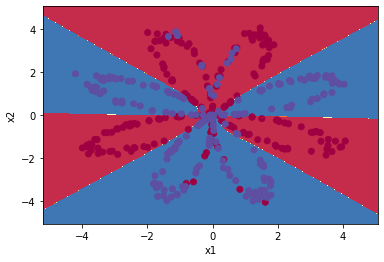

In [507]:
plot_decision_boundary(lambda x: predict(weights, x.T), X, Y)

In [523]:
import sklearn.datasets
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datas = [noisy_circles, noisy_moons, blobs, gaussian_quantiles]


In [553]:
X, Y = blobs
Y

array([2, 3, 4, 3, 1, 2, 5, 2, 0, 2, 0, 1, 0, 0, 4, 2, 0, 4, 4, 2, 4, 1,
       2, 5, 1, 0, 5, 0, 2, 3, 4, 2, 3, 0, 5, 2, 2, 0, 2, 5, 0, 4, 1, 1,
       0, 0, 3, 5, 0, 0, 2, 0, 3, 0, 5, 2, 5, 2, 1, 0, 2, 4, 4, 2, 5, 4,
       3, 5, 1, 4, 2, 3, 2, 1, 1, 4, 1, 3, 1, 3, 2, 3, 4, 5, 1, 4, 4, 0,
       0, 2, 4, 2, 5, 4, 0, 4, 5, 3, 1, 3, 3, 1, 0, 1, 2, 1, 1, 3, 3, 0,
       5, 0, 5, 2, 1, 5, 3, 3, 1, 4, 2, 5, 1, 3, 3, 5, 2, 1, 3, 4, 0, 5,
       1, 1, 1, 5, 3, 1, 0, 0, 5, 3, 5, 5, 2, 3, 5, 4, 1, 0, 5, 4, 2, 5,
       5, 2, 0, 0, 1, 3, 3, 3, 3, 0, 2, 4, 0, 4, 4, 1, 3, 0, 4, 5, 2, 4,
       4, 5, 1, 1, 3, 5, 1, 4, 4, 1, 2, 5, 0, 4, 3, 1, 5, 4, 3, 4, 2, 5,
       3, 0])

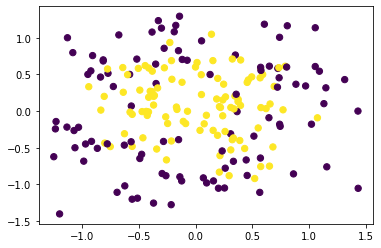

80.0


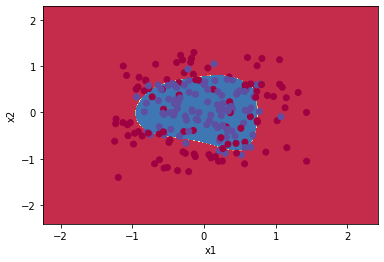

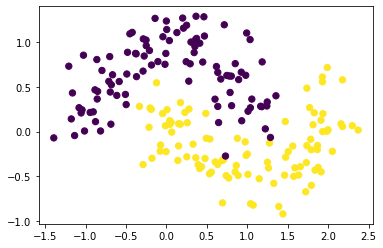

99.5


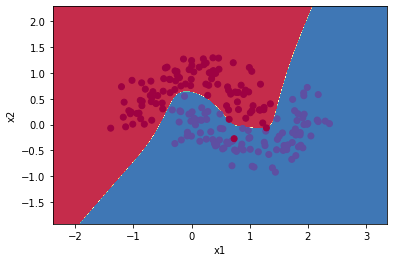

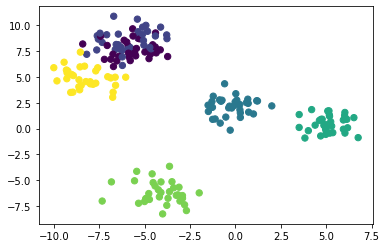

17.0


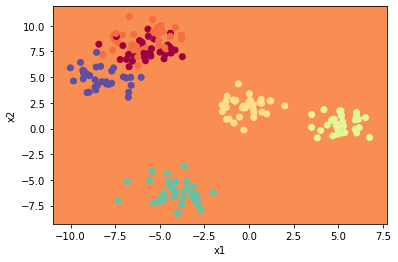

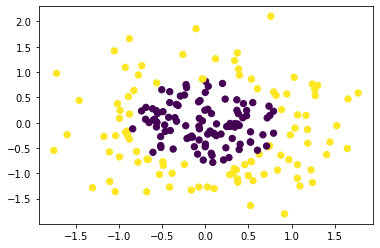

100.0


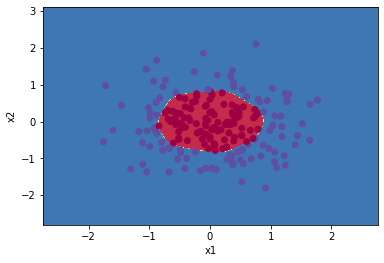

In [547]:
# running model on all datasets
for data in datas:
    X, Y = data
    Y = Y.reshape(Y.shape[0], -1)
    X, Y = X.T, Y.T
    plt.scatter(X[0], X[1], s=40, c=Y);
    plt.show()
    weights = nn_model(X, Y, 20, learning_rate=0.1, num_iteration=50000, print_cost=False)
    prd = predict(weights, X)
    print(np.mean(prd==Y)*100)
    plot_decision_boundary(lambda x: predict(weights, x.T), X, Y)
    plt.show()
    